In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import KFold, cross_validate

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\ankit'

In [5]:
os.chdir("D:\\Datasets\\")

**Importing the Data**

In [7]:
df = pd.read_csv("social_networks.csv")

In [8]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**Checking Null values**

In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Now labeling the Gender Column**

In [12]:
df.Gender = LabelEncoder().fit_transform(df.Gender)

In [13]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


**Checking Correlation of Gender**

In [17]:
from scipy.stats import spearmanr
stat, p = spearmanr(df.Gender, df.Purchased)
print(stat, p)
if p < 0.05:
  print("distribution seems to have correlation.")
else: 
  print("No correlation in the distribution.")

-0.04246945626450935 0.3969320199450945
No correlation in the distribution.


"Excluding Gender in the first trial of modeling since it has almost no linear correlation to Purchase."
**Salary VS Age graph**

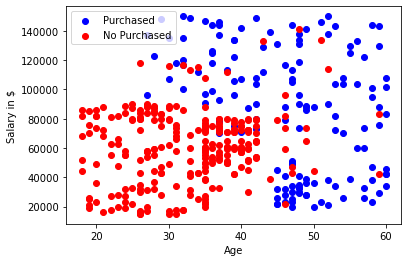

In [18]:
plt.scatter(df.Age[df.Purchased == 1], df.EstimatedSalary[df.Purchased == 1], color='b', label="Purchased" )
plt.scatter(df.Age[df.Purchased == 0], df.EstimatedSalary[df.Purchased == 0], color='r', label="No Purchased")
plt.xlabel('Age')
plt.ylabel("Salary in $")
plt.legend()
plt.show()

**Feature Scaling**

In [19]:
X = df[['Age',"EstimatedSalary"]]
#Normalyzing X with standard scaler
X= StandardScaler().fit_transform(X)
y = df.Purchased

**Model Testing**

In [20]:
#Splitting the dataset into the Training set and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.25, random_state=42)

#Creating and fitting model (polifit of 1 degree, --> linear) -- Optimized after C value
clf = SVC(kernel="poly", degree=1, C=0.1, probability=True)
#clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

#Getting Score
score = clf.score(X_test, y_test)
print(score)

0.78


**Determing optimal value of C(error)**

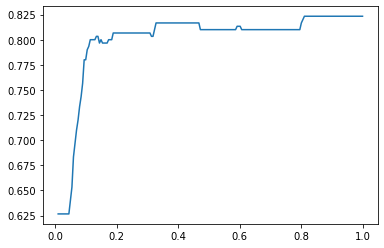

In [21]:
scores=[]
length=1
for i in np.linspace(0.01,length,200):
    clf = SVC(kernel="poly", degree=1, C=i, probability=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    
plt.plot(np.linspace(0.01,length,200), scores)
plt.show()

***Cross Validation***

In [22]:
#Scoring dictionary
scoring = {"accuracy": metrics.make_scorer(metrics.accuracy_score),
          "f1_score" : metrics.make_scorer(metrics.f1_score)}

#Kfolds
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

cros_validation_scores = cross_validate(estimator=clf, X=X , y=y , cv=kfold, scoring=scoring)

print(f"Cross Validation Accuracy: {np.mean(cros_validation_scores['test_accuracy']):0.3f} +/- {np.std(cros_validation_scores['test_accuracy']):0.3f} (1 std)")
print(f"Cross Validation f1_score: {np.mean(cros_validation_scores['test_f1_score']):0.3f} +/- {np.std(cros_validation_scores['test_f1_score']):0.3f} (1 std)")

Cross Validation Accuracy: 0.840 +/- 0.036 (1 std)
Cross Validation f1_score: 0.746 +/- 0.066 (1 std)


**Confusion Matrix**

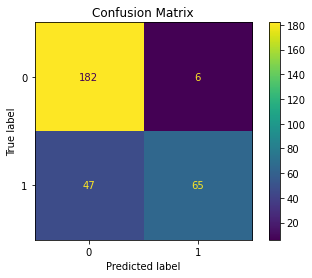

In [23]:
plot_confusion_matrix(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

**Training the Model**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


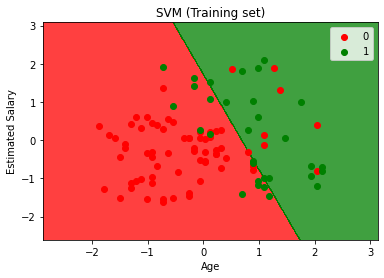

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visulatizing Test Result**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


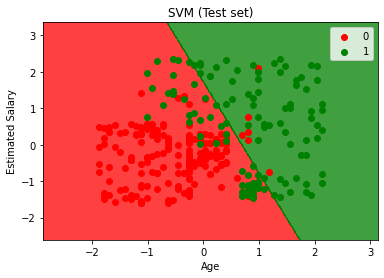

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Support Vector**


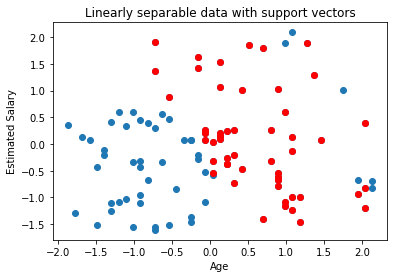

In [26]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()